# ICAT3190, Module 5, Supervised machine learning

## Machine learning

![featureextraction_p.svg](kuvat/featureextraction_p.svg)

 * The purpose of the supervised machine learning is the teach an algorithm to repeat the work done by a reference method
 * This is usefull if the reference method is more expensive, slower or it has other problems
 * Often the reference method is a human observer, and it can be replaced with an algorithm

## The target of supervised machine learning
Task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$



In [ ]:
# Supervised machine learning methods for decision making (Classification)



# Classification


In [3]:
# Import standard stuff, plus material from Scikit Learn

import numpy as np
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Read the IRIS data set for later use
import seaborn as sns   
sns.set(style='ticks')  
iris = sns.load_dataset('iris')   


# Distance

 - Clustering, classification and regression assume that samples near each other, at close proximity, are more similar with each other than those which are farther away. 

But what do we mean by distance?

There are many distance metrics:
 - Euclidean distance $r_{1,2}=\sqrt{(x_1 -x_2)^2 + (y_1 - y_2)^2 + (z_1 -z_2)^2}$
 - Manhattan distance $r_{1,2}=|x_1-x_2| + |y_1-y_2| + |z_1-z_2|$
 - [Mahalanobis distance](https://www.statisticshowto.datasciencecentral.com/mahalanobis-distance/) 
   $r_{1,2}== \sqrt{(p_1 – p_2)^T \; C^{-1} \; (p_1 – p_2)}$, where $C$ is the covariance matrix.
   

Text(0,0.5,'Feature 2')

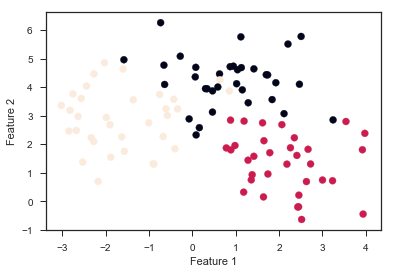

In [4]:
# Create a synthetic data set and plot it
X,y=datasets.make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## What if the scaling is different?

Text(0,0.5,'Feature 2')

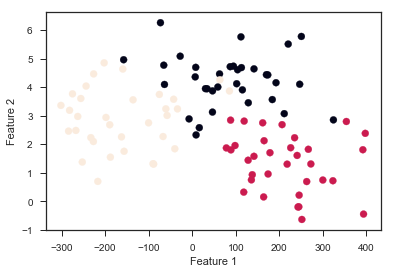

In [7]:
# Create a synthetic data set and plot it
X,y=datasets.make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
X2= X*[100,1]
y2=y
plt.scatter(X2[:,0], X2[:,1], c=y2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

The problem is that the distances are dominated by feature1 and feature 2 is not significant, even though intuitively it seems to be very important for classification.

## Then scale it first
To elimninate the distortion due to scaling, normalise the varibles first. Usullay they are normalized so that the means and standard deviations are are the same. Usually $\bar{x}=0$¸ and $\sigma_x =1$.

 $$x=\frac{x-\bar{x}}{\sigma_x}$$,
 where $\bar{x}$ is the mean value of x.
 
 Scikit Learn includes StandardScaler() object for standardisation of features:
 


Text(0,0.5,'Feature 2')

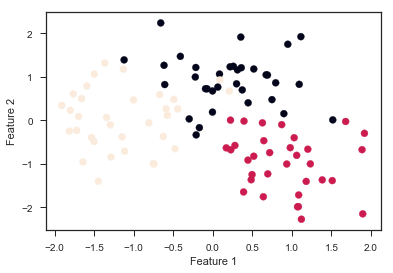

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X2)
X2s=scaler.transform(X2)
plt.scatter(X2s[:,0], X2s[:,1], c=y2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Now both features have equal weights.

But beware outliers when scaling features. Only one outlier can spoil your scaling! There are also robust scalers.

# Nearest Neighbours methods

Nearest Neighbour methods provide some very staightforward methods for supervised machine learning

## Brute force implementation

 1. Set the number of nearest neighbours, $K$
 1. To predict one new sample, calculate its distance to all known training samples
 1. Order the list of distances
 1. Select $K$ nearest samples and use them for prediction
    - In case of classification, the result is the mode of the K-nearest set
    - In case of regression, the result is for example the average of the K-nearest set


- The asymptotic execution time of the brute for implementation is $\mathcal{O}[D N^2]$ which makes it unsuitable for large data sets and high dimesional problems
- To extend NN method, the neighbourhood information can be encoded in a tree structure to reduce the number of distances which need to be calculated. For example a KD-Tree implementation can be calculated in $\mathcal{O}[D N \log ({N})]$ time.
- The Ball-Tree implementation makes algorith even more suitable in high-dimensional problems 

In [23]:
from sklearn import neighbors
n_neighbors = 5
knn=neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X,y)
knn.predict(X)


array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

In [24]:
import sklearn.metrics as metrics
print(metrics.confusion_matrix(y_true=y, y_pred=knn.predict(X), labels=None, sample_weight=None))
print(metrics.accuracy_score(y_true=y, y_pred=knn.predict(X)))


knn2=neighbors.KNeighborsClassifier(n_neighbors)
knn2.fit(X2s,y)
print(metrics.accuracy_score(y_true=y, y_pred=knn2.predict(X2s)))

[[31  2  1]
 [ 0 33  0]
 [ 2  0 31]]
0.95
0.96


### Pipelining 
In Scikit Learn, all methods are build using the same interface. This makes it easier to build larger machine learning systems by combining different stages together as pipelines. 

For example, the scaling of features, dimensionality reduction, and sclassification can be combined as a single pipeline. This is especially usefull, when several datasets (validation data, testing data, production data, etc) needs to be fed through the same stages.

In [28]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
        ('Scaling', StandardScaler()),
        ('KNN', neighbors.KNeighborsClassifier(n_neighbors))
    ])
pipeline.fit(X2,y)
predictedY=pipeline.predict(X2)

print(metrics.confusion_matrix(y_true=y, y_pred=predictedY))
print(metrics.accuracy_score(y_true=y, y_pred=predictedY))


[[32  1  1]
 [ 0 33  0]
 [ 2  0 31]]
0.96


## Visualization of the decision boundaries

In [33]:
from matplotlib.colors import ListedColormap
def plotDB(h=0.2):
    # h = step size in the mesh 
    # Create color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for weights in ['uniform', 'distance']:
        pipeline.fit(X,y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))


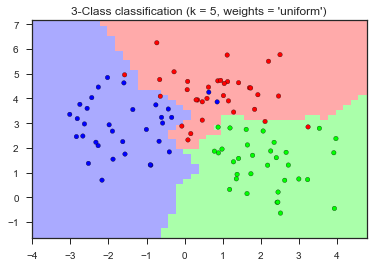

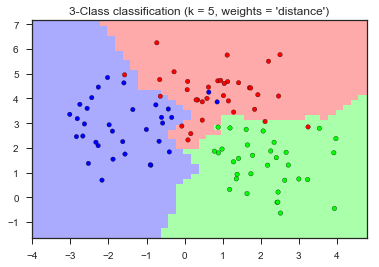

In [34]:
plotDB(h=0.2)

### Variations
 - Nearest Centroid classifier
   - The training data is replaced with a centroid of each class
 - Neigborhood Component Analysis (NCA)
   - The coordinate axis are changed so that the separation between the classes is maximized
   - This supervised dimensionality reduction method can be used for exploring the data
   - It can also improve the performance of NN classifiers or regressors